# Build Graphs

In this notebook we build graphs from the raw data.

In [1]:
from gnn_tracking.utils.plotting import EventPlotter
from gnn_tracking.graph_construction.graph_builder import GraphBuilder
from gnn_tracking.preprocessing.point_cloud_builder import PointCloudBuilder
from gnn_tracking.utils.plotting import PointCloudPlotter
from pathlib import Path

In [2]:
data_path = Path("D:\Devdoot\Princeton RSE\dataset")
# Unprocessed data should live here
'''
input_dir = data_path / "point cloud\data"
assert data_path.is_dir()
'''

'\ninput_dir = data_path / "point cloud\\data"\nassert data_path.is_dir()\n'

In [7]:
assert data_path.is_dir()

In [3]:
'''
# The event id that you use for these examples
evtid = 21000
# If the following statement doesn't pass, maybe you need a different
# evtid
assert (input_dir / f"event{evtid:09}-cells.csv.gz").is_file()
'''

'\n# The event id that you use for these examples\nevtid = 21000\n# If the following statement doesn\'t pass, maybe you need a different\n# evtid\nassert (input_dir / f"event{evtid:09}-cells.csv.gz").is_file()\n'

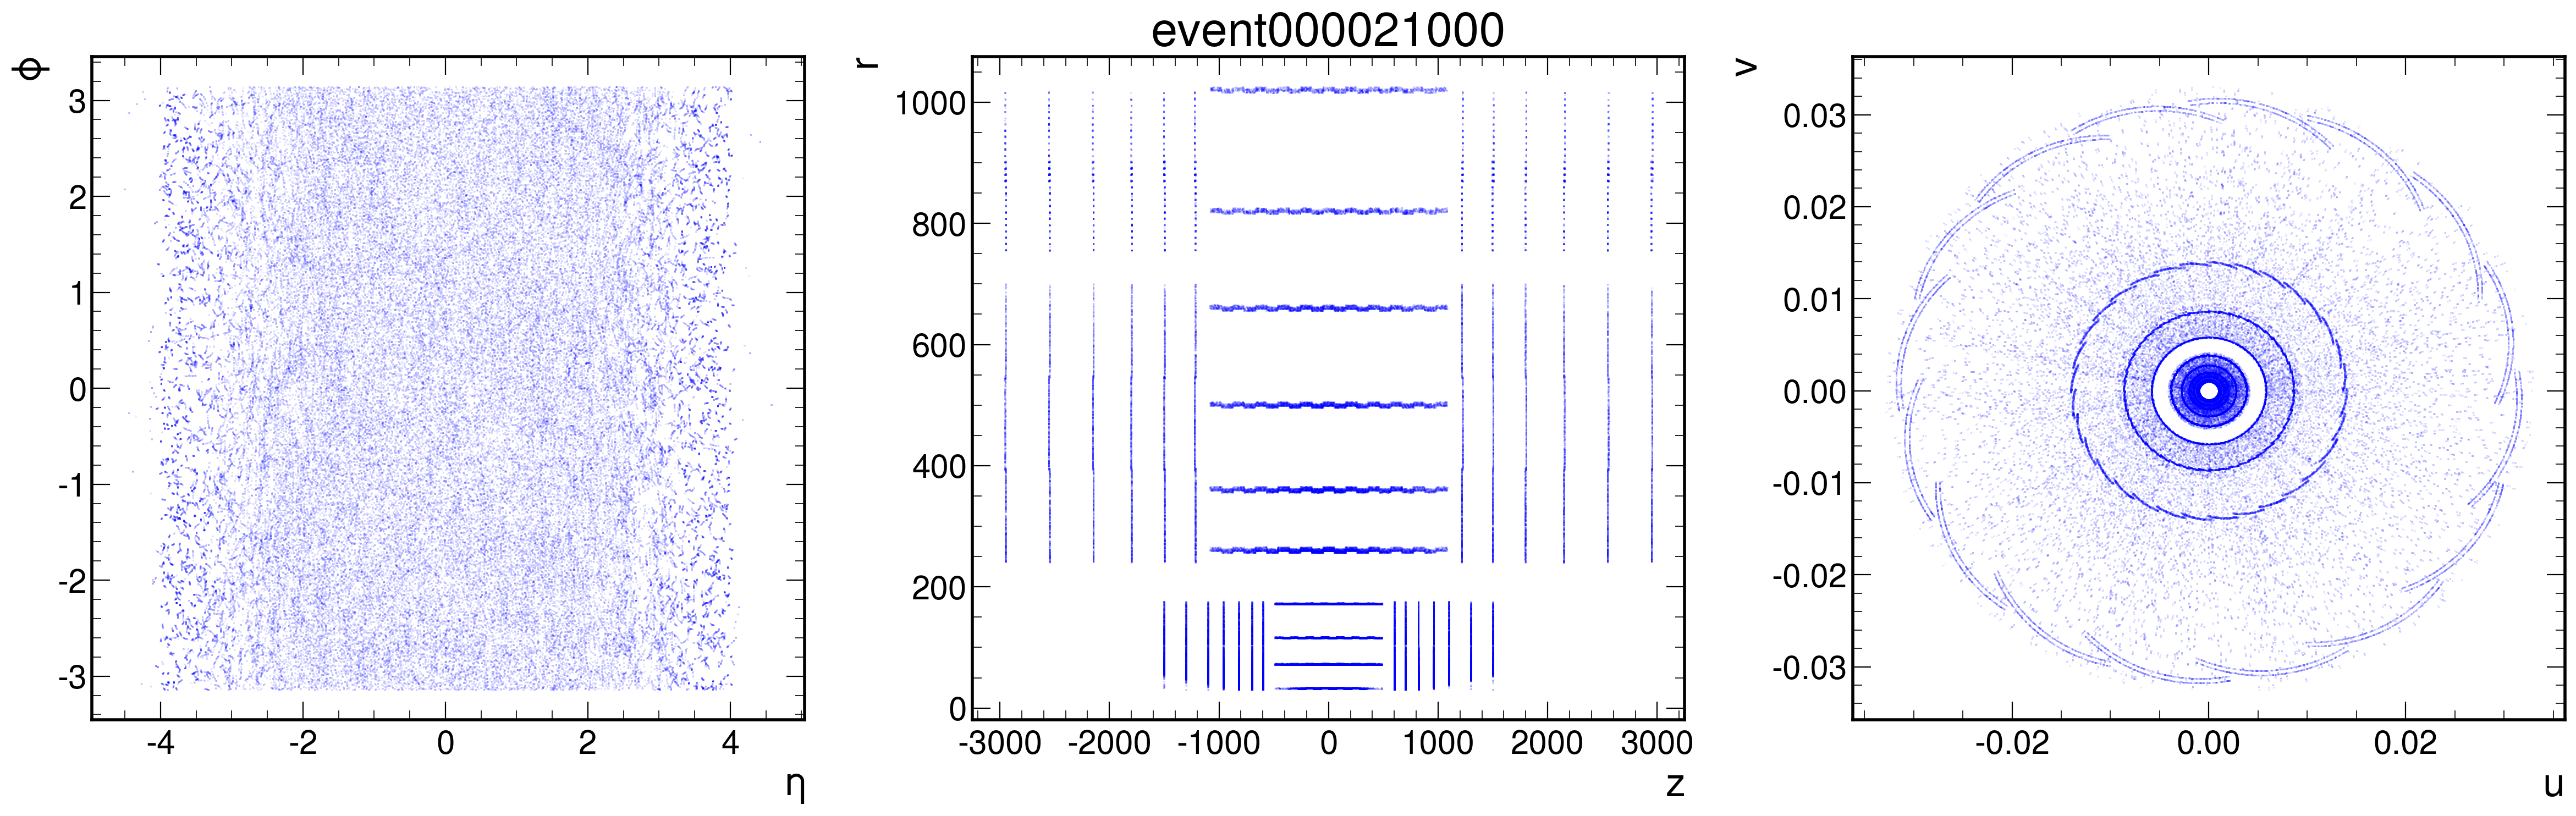

In [12]:
'''
# The input directory should contain the trackml dataset
event_plotter = EventPlotter(indir=input_dir)
event_plotter.plot_ep_rv_uv(evtid=evtid)
'''

In [4]:
'''
# build point clouds for each sector in the pixel layers only
pc_builder = PointCloudBuilder(
    indir=input_dir,
    outdir=data_path / "point_clouds\data",
    n_sectors=32,
    pixel_only=True,
    redo=False,
    measurement_mode=False,
    sector_di=0,
    sector_ds=1.3,
    thld=0.9,
    log_level=0,
)
pc_builder.process(stop=10)
'''

'\n# build point clouds for each sector in the pixel layers only\npc_builder = PointCloudBuilder(\n    indir=input_dir,\n    outdir=data_path / "point_clouds\\data",\n    n_sectors=32,\n    pixel_only=True,\n    redo=False,\n    measurement_mode=False,\n    sector_di=0,\n    sector_ds=1.3,\n    thld=0.9,\n    log_level=0,\n)\npc_builder.process(stop=10)\n'

In [5]:
'''
# visualize the sectors in each event and an overlapped ('extended') sector
pc_plotter = PointCloudPlotter(
    data_path / "point cloud/data", n_sectors=pc_builder.n_sectors
)
pc_plotter.plot_ep_rv_uv_all_sectors(evtid)
pc_plotter.plot_ep_rv_uv_with_boundary(
    evtid, 18, pc_builder.sector_di, pc_builder.sector_ds
)
'''

'\n# visualize the sectors in each event and an overlapped (\'extended\') sector\npc_plotter = PointCloudPlotter(\n    data_path / "point cloud/data", n_sectors=pc_builder.n_sectors\n)\npc_plotter.plot_ep_rv_uv_all_sectors(evtid)\npc_plotter.plot_ep_rv_uv_with_boundary(\n    evtid, 18, pc_builder.sector_di, pc_builder.sector_ds\n)\n'

In [9]:
graph_builder = GraphBuilder(
    indir=data_path / "point cloud",
    outdir=data_path / "graph constructed",
    redo=False,
    measurement_mode=False,
    phi_slope_max=0.0035,
    z0_max=200,
    dR_max=2.3,
    log_level=0,
)
graph_builder.process(start=0, stop=900)

[18:45:41 GraphBuilder] WARNING: Collecting data is deprecated. Please use graph_builder.load_data instead.
[18:45:42] INFO: Processing 900 graphs (out of 900 available).
